# Netflix Content Strategy Analysis


## Introduction
Netflix, as a leading streaming platform, possesses a vast and diverse content library. This analysis aims to leverage data-driven insights to guide content acquisition, production strategies, and optimize release schedules across global markets.


## Problem Statement
The objective is to analyze the existing content database to inform strategic decisions on:
1. The type of content to prioritize for production or acquisition.
2. Optimal release strategies in different global markets.
3. Preferences for content genres and successful directors across various demographics.


## Analysis Objectives
- **Content Type Analysis:** Determine the prevalence and trends of movies vs TV shows and analyse content popularity in specific regions.
- **Geographic Content Strategy:** Identify major content-producing countries and potential markets for expansion.
- **Temporal Release Strategy:** Recommend optimal times for releasing new content to maximize engagement.
- **Genre and Director Focus:** Evaluate popular genres and directors to guide future productions and collaborations.
- **Viewer Preferences:** Assess viewer preferences through ratings and viewership data to identify potentially underserved niches.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


This dataset includes information on 8,807 titles from Netflix, featuring both movies and TV shows. Each title is described by 12 different details like its unique ID, whether it's a movie or show, the director, actors, where it was made, when it was added to Netflix, release year, viewer ratings, how long it is, its genre, and a short description. The data covers a variety of types, from simple lists to full text, making it ideal for exploring to find patterns in what content is preferred, how it's made, and how it's released.

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df.shape

(8807, 12)


The dataset includes a total of **8,807 entries** spanning **12 different attributes**. Below is a summary of missing values in each column:

- **Director:** 2,634 missing entries. A significant number of titles lack listed director information.
- **Cast:** Missing details for 825 entries, indicating some records do not include actor information.
- **Country:** 831 entries do not specify the production country.
- **Date Added:** 10 titles do not have recorded addition dates to Netflix's platform.
- **Rating:** 4 entries are missing viewer ratings.
- **Duration:** 3 titles lack duration details.

Despite these gaps, each entry is consistently equipped with identifiers and descriptive information like show ID, title, release year, genre, and a brief description. This allows for substantial analysis possibilities on available data.

**Dataset Shape:**
The data is organized into a matrix of 8,807 rows and 12 columns, ensuring a comprehensive coverage across various dimensions of content available on Netflix.


In [7]:
df['rating'] = df['rating'].fillna('0')

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df['director']=df['director'].fillna('Unknown Director')

In [10]:
df['cast']=df['cast'].fillna("Unknown Actors")

In [11]:
df['country']=df['country'].fillna('Unknown')

In [12]:
df['duration']=df['duration'].fillna('Unknown')

In [13]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(8797, 12)

In [16]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8797.0,2014.183472,8.822191,1925.0,2013.0,2017.0,2019.0,2021.0


In [18]:

print("Unique Types:", df['type'].unique())
print("Count of Each Type:\n", df['type'].value_counts())


print("\nUnique Directors:", df['director'].nunique())
print("Top 10 Frequent Directors:\n", df['director'].value_counts().head(10))


print("\nCountries with Most Productions:\n", df['country'].value_counts().head(10))


print("\nContent Release Frequency by Year:\n", df['release_year'].value_counts().sort_index())


print("\nRatings Distribution:\n", df['rating'].value_counts())


print("\nUnique Genres:", df['listed_in'].apply(lambda x: x.split(", ")).explode().nunique())
print("Genre Popularity:\n", df['listed_in'].apply(lambda x: x.split(", ")).explode().value_counts().head(10))




Unique Types: ['Movie' 'TV Show']
Count of Each Type:
 Movie      6131
TV Show    2666
Name: type, dtype: int64

Unique Directors: 4529
Top 10 Frequent Directors:
 Unknown Director          2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: director, dtype: int64

Countries with Most Productions:
 United States     2812
India              972
Unknown            830
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Content Release Frequency by Year:
 1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1146
2019    1030
2020     953
2021     592
Name: release_year, Leng

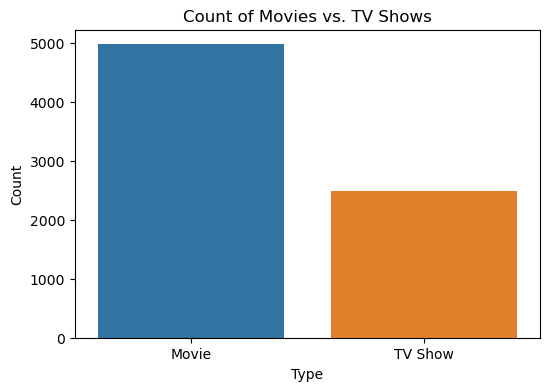

In [57]:
# Create a countplot for type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


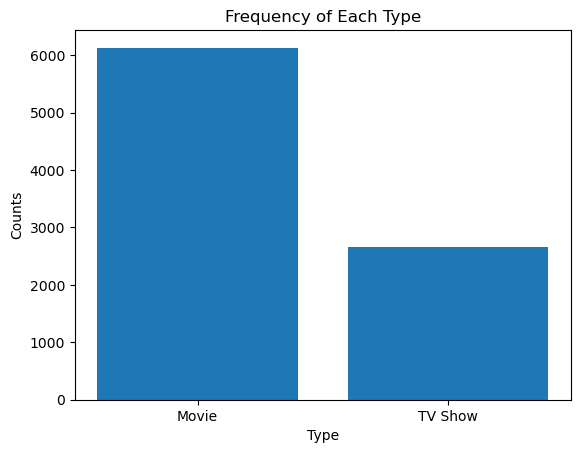

In [19]:

type_counts = df['type'].value_counts()

# Create the bar plot
plt.bar(x=type_counts.index, height=type_counts.values)

# Adding labels and title for clarity
plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Frequency of Each Type')

# Display the plot
plt.show()

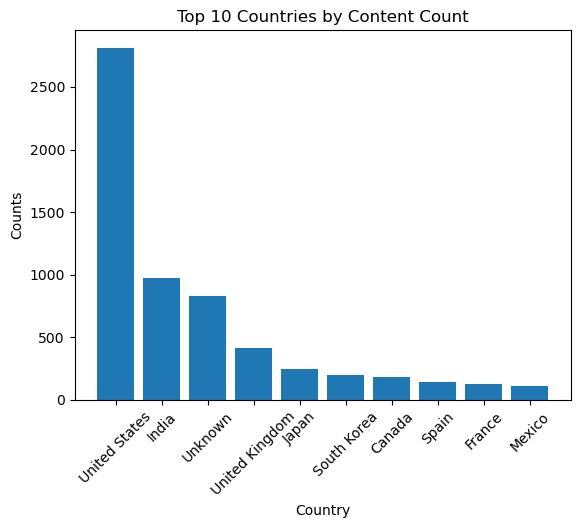

In [20]:
# Calculate the value counts and select the top 10
country_counts = df['country'].value_counts().head(10)

# Create the bar plot
plt.bar(x=country_counts.index, height=country_counts.values)

# Adding labels and title for clarity
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Top 10 Countries by Content Count')
plt.xticks(rotation=45)  # Rotate the country names for better readability

# Show the plot
plt.show()

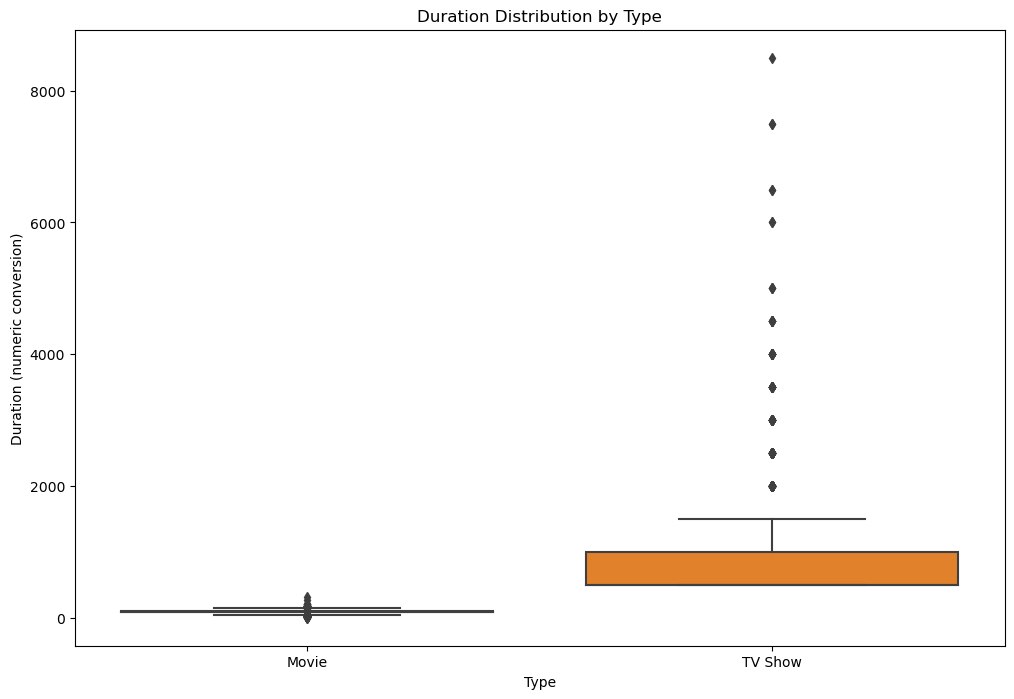

In [60]:
# Handle duration conversion to numeric values
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)  # Extract numeric part
df['duration_numeric'] = df.apply(
    lambda x: x['duration_numeric'] * 500 if 'Season' in x['duration'] else x['duration_numeric'] * 1,
    axis=1
)

# Ensure no NaNs before conversion to int, or handle them appropriately
df['duration_numeric'] = pd.to_numeric(df['duration_numeric'], errors='coerce')

# Boxplot for 'duration_numeric' across 'type'
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='duration_numeric', data=df)
plt.title('Duration Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Duration (numeric conversion)')
plt.show()

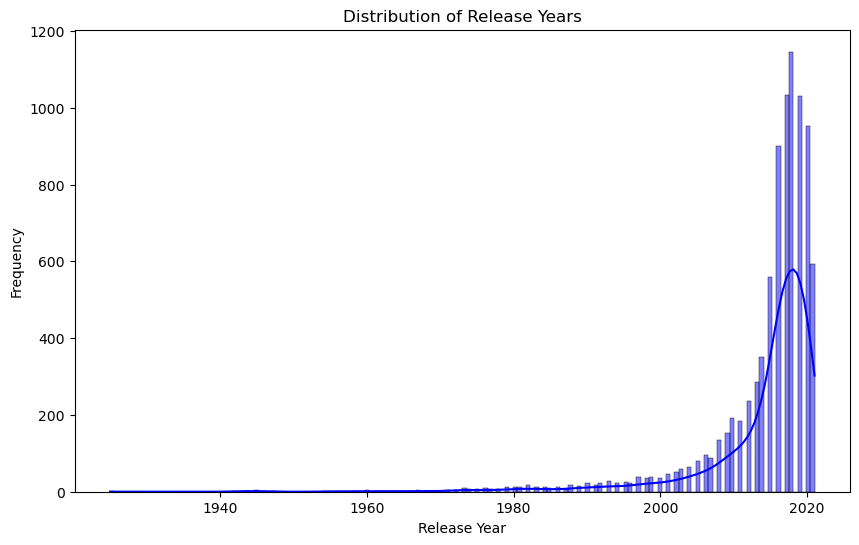

In [21]:
# Plotting the distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


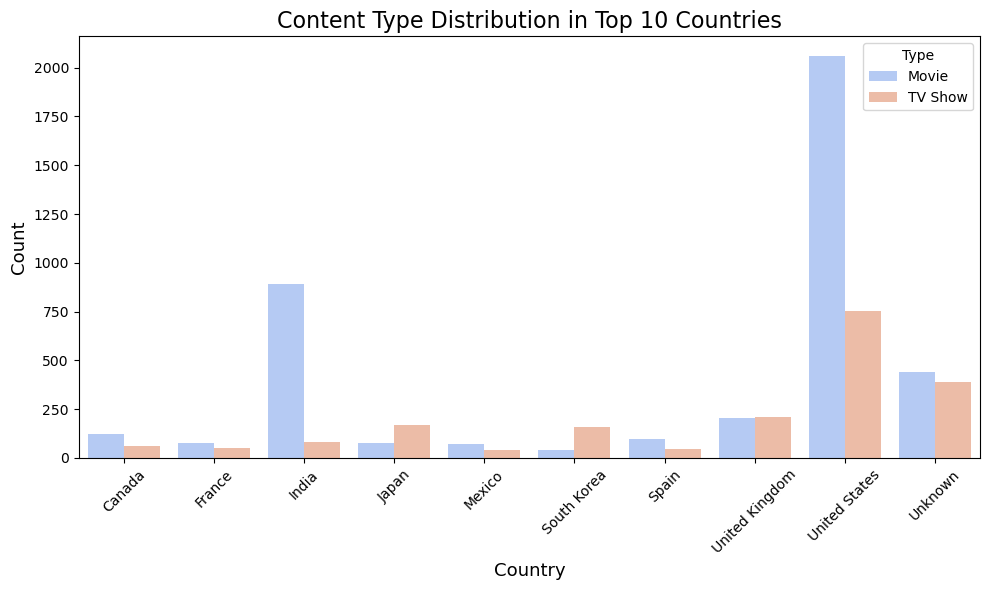

In [22]:

# Step 1: Determine the top 10 countries by the total number of entries
top_countries = df['country'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only entries from the top 10 countries
filtered_df = df[df['country'].isin(top_countries)]

# Step 3: Create a DataFrame that counts the number of each type for these countries
country_type_counts = filtered_df.groupby(['country', 'type']).size().reset_index(name='count')

# Step 4: Plotting the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', hue='type', data=country_type_counts, palette='coolwarm')

# Adding labels and title
plt.title('Content Type Distribution in Top 10 Countries', fontsize=16)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=45)  # Rotate country names for better readability

plt.legend(title='Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [23]:
movies_df = df[df['type'] == 'Movie']
movie_counts = movies_df.groupby('country')['title'].nunique()
top_10_movie_producing_countries = movie_counts.sort_values(ascending=False).head(10)

In [24]:
top_10_movie_producing_countries

country
United States     2058
India              893
Unknown            440
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Japan               76
Name: title, dtype: int64

In [25]:
# Step 1: Filter the DataFrame to only include TV Shows
tv_shows_df = df[df['type'] == 'TV Show']

# Step 2: Group by country and count unique TV Show titles
tv_show_counts = tv_shows_df.groupby('country')['title'].nunique()

# Step 3: Sort the counts and pick the top 10
top_10_tv_show_producing_countries = tv_show_counts.sort_values(ascending=False).head(10)

print(top_10_tv_show_producing_countries)

country
United States     754
Unknown           390
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: title, dtype: int64


In [26]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [27]:
df['week_of_year'] = df['date_added'].dt.isocalendar().week

In [28]:
movies_by_week = df[df['type'] == 'Movie'].groupby('week_of_year').size()

In [29]:
tv_shows_by_week = df[df['type'] == 'TV Show'].groupby('week_of_year').size()

In [30]:
best_week_movies = movies_by_week.idxmax()
best_week_tv_shows = tv_shows_by_week.idxmax()

In [31]:
print("Best week to release a Movie:", best_week_movies, "with", movies_by_week[best_week_movies], "releases.")
print("Best week to release a TV Show:", best_week_tv_shows, "with", tv_shows_by_week[best_week_tv_shows], "releases.")

Best week to release a Movie: 1 with 316 releases.
Best week to release a TV Show: 27 with 86 releases.


In [32]:
# Step 2: Extract month and create a new column
df['month_of_year'] = df['date_added'].dt.month

# Step 3a: Group by month for Movies
movies_by_month = df[df['type'] == 'Movie'].groupby('month_of_year').size()

# Step 3b: Group by month for TV Shows
tv_shows_by_month = df[df['type'] == 'TV Show'].groupby('month_of_year').size()

# Step 4: Identify best month to release Movies and TV Shows
best_month_movies = movies_by_month.idxmax()
best_month_tv_shows = tv_shows_by_month.idxmax()

print("Best month to release a Movie:", best_month_movies, "with", movies_by_month[best_month_movies], "releases.")
print("Best month to release a TV Show:", best_month_tv_shows, "with", tv_shows_by_month[best_month_tv_shows], "releases.")

Best month to release a Movie: 7 with 565 releases.
Best month to release a TV Show: 12 with 266 releases.


In [33]:
director_title_counts = df.groupby('director')['title'].nunique()

# Step 3: Sort the results and pick the top 10 directors
top_10_directors = director_title_counts.sort_values(ascending=False).head(10)

print(top_10_directors)

director
Unknown Director          2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: title, dtype: int64


In [34]:
# Step 2: Expand the 'cast' column to un-nest actors
df['cast'] = df['cast'].str.split(', ')
df_exploded = df.explode('cast')

# Step 3: Group by actor and count unique titles
actor_title_counts = df_exploded.groupby('cast')['title'].nunique()

# Step 4: Sort the results and find actors with the most unique titles
top_actors = actor_title_counts.sort_values(ascending=False)

print(top_actors)

cast
Unknown Actors      825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
                   ... 
Chinmay Kambli        1
Kumkum Chouhan        1
Kumkum                1
Kumiko Aso            1
Ṣọpẹ́ Dìrísù          1
Name: title, Length: 36404, dtype: int64


In [35]:
top_actors.head(10)

cast
Unknown Actors      825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: title, dtype: int64

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_of_year,month_of_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown Actors],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,Unknown Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,9
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,[Unknown Actors],Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,9
4,s5,TV Show,Kota Factory,Unknown Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,9


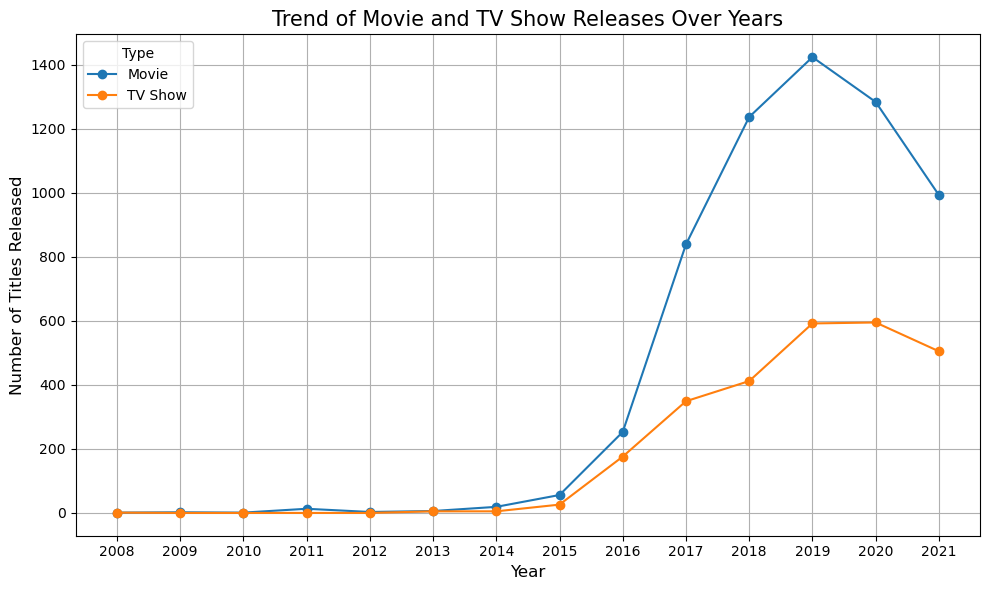

In [37]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year  


type_year_count = df.groupby(['type', 'year']).size().unstack(fill_value=0)


type_year_count.T.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of Movie and TV Show Releases Over Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.grid(True)
plt.xticks(range(min(df['year']), max(df['year'])+1))  
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [38]:
from wordcloud import WordCloud


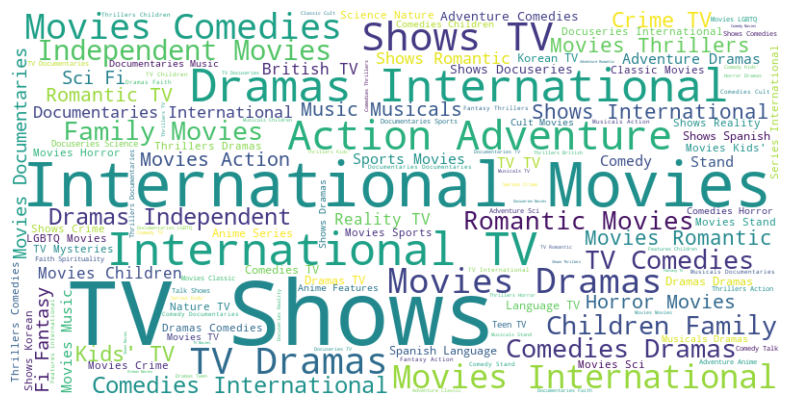

In [39]:
all_genres = ', '.join(df['listed_in'].dropna())  


wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_genres)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

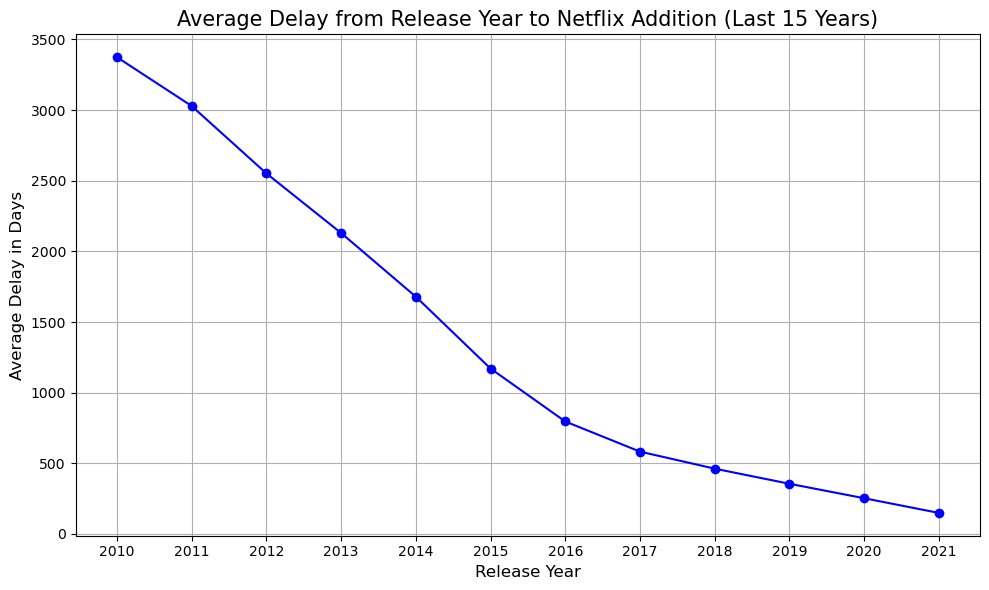

In [40]:
from datetime import datetime
# Determine the current year and calculate the last 15 years
current_year = datetime.now().year
start_year = current_year - 15

# Step 1: Data Preparation
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_date'] = pd.to_datetime(df['release_year'].astype(str) + '-01-01')
df = df[df['release_year'] >= start_year]  # Filter to last 15 years

# Step 2: Calculate the Difference
df['days_to_netflix'] = (df['date_added'] - df['release_date']).dt.days

# Step 3: Aggregate the data by release year
average_delay_by_year = df.groupby('release_year')['days_to_netflix'].mean()

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
average_delay_by_year.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Delay from Release Year to Netflix Addition (Last 15 Years)', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Delay in Days', fontsize=12)
plt.grid(True)
plt.xticks(list(average_delay_by_year.index))  # Ensure all years are labeled
plt.tight_layout()
plt.show()

In [41]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_of_year,month_of_year,year,release_date,days_to_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown Actors],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9,2021,2020-01-01,633
1,s2,TV Show,Blood & Water,Unknown Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9,2021,2021-01-01,266
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,9,2021,2021-01-01,266
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,[Unknown Actors],Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,9,2021,2021-01-01,266
4,s5,TV Show,Kota Factory,Unknown Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,9,2021,2021-01-01,266


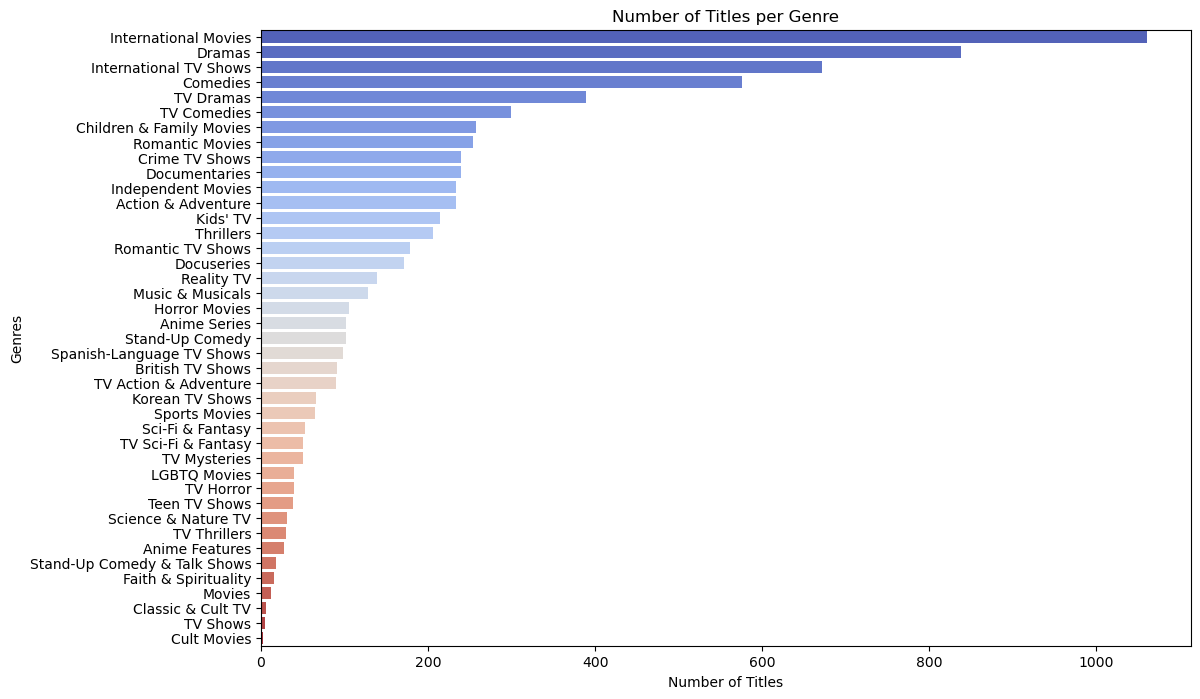

In [42]:
# Parse 'listed_in' to extract individual genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(', ')).explode('genres')

# Count the occurrences of each genre
genre_counts = df['genres'].value_counts()

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Number of Titles per Genre')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()


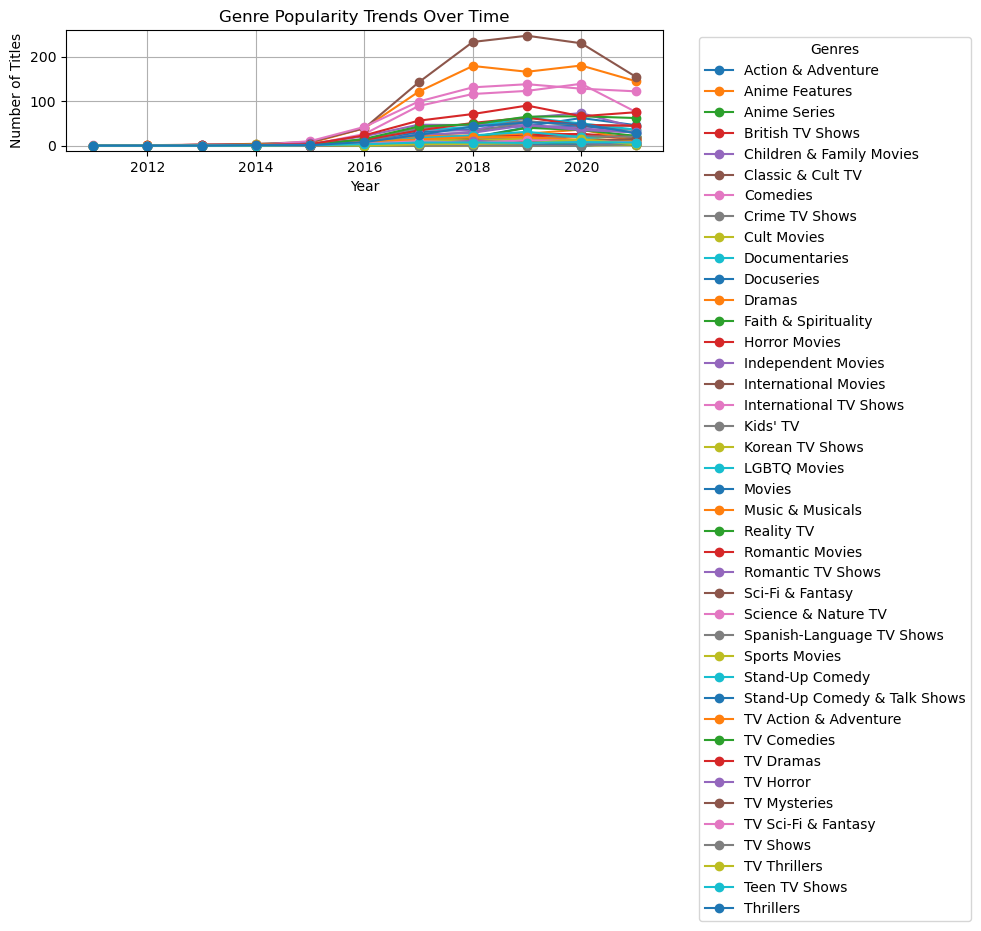

In [43]:
# Group by year and genre, then count occurrences
genre_trends = df.groupby(['year', 'genres']).size().unstack(fill_value=0)

# Pivot the data for visualization
genre_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Genre Popularity Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '0',
       'TV-Y7-FV', 'UR'], dtype=object)

In [45]:
df['length'] = df['rating'].str.extract(r'(\d+ min)')

# Step 2: Clean Up Rating Column
# Replace any 'xx min' entries with NaN or another placeholder in the 'rating' column
df['rating'] = df['rating'].replace(r'\d+ min', "Rating Not Avilable", regex=True)

In [46]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Rating Not Avilable', 'NR', '0', 'TV-Y7-FV',
       'UR'], dtype=object)

In [47]:
df[df['rating']=='0']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_of_year,month_of_year,year,release_date,days_to_netflix,genres,length
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,"[Oprah Winfrey, Ava DuVernay]",Unknown,2017-01-26,2017,0,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,4,1,2017,2017-01-01,25,Music & Musicals,NaN
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown Director,"[Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, K...",Japan,2016-12-01,2013,0,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",48,12,2016,2013-01-01,1430,Comedies,NaN
7312,s7313,TV Show,Little Lunch,Unknown Director,"[Flynn Curry, Olivia Deeble, Madison Lu, Oisín...",Australia,2018-02-01,2015,0,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",5,2,2018,2015-01-01,1127,Anime Series,NaN
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"[Leone Frisa, Paolo Vaccarino, Francesco Migli...",Italy,2017-03-01,2015,0,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",9,3,2017,2015-01-01,790,TV Comedies,NaN


In [48]:
df['rating']=df['rating'].replace('0','Rating Not Avilable')

In [49]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Rating Not Avilable', 'NR', 'TV-Y7-FV',
       'UR'], dtype=object)

<Figure size 1200x800 with 0 Axes>

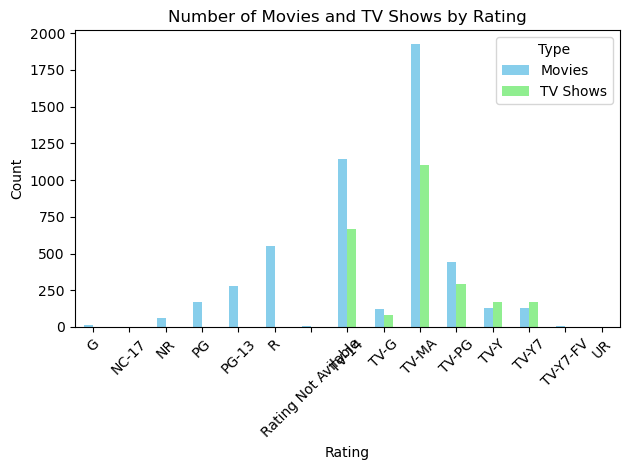

In [50]:
movie_counts = df[df['type'] == 'Movie']['rating'].value_counts().sort_index()
tv_show_counts = df[df['type'] == 'TV Show']['rating'].value_counts().sort_index()

# Step 2: Visualize
# Create a DataFrame for easier plotting
rating_counts_df = pd.DataFrame({'Movies': movie_counts, 'TV Shows': tv_show_counts}).fillna(0)  # Fill NaN with 0 for missing categories

# Plotting
plt.figure(figsize=(12, 8))
rating_counts_df.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Movies and TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


### MPAA Film Ratings:
- **G (General Audiences)**: All ages admitted. Nothing that would offend parents for viewing by children.
- **PG (Parental Guidance Suggested)**: Some material may not be suitable for children.
- **PG-13 (Parents Strongly Cautioned)**: Some material may be inappropriate for children under 13.
- **R (Restricted)**: Under 17 requires accompanying parent or adult guardian.
- **NC-17 (Adults Only)**: No one 17 and under admitted.

### TV Content Ratings (U.S. TV Parental Guidelines):
- **TV-Y (All Children)**: This program is designed to be appropriate for all children.
- **TV-Y7 (Directed to Older Children)**: This program is designed for children age 7 and above.
- **TV-Y7-FV (Directed to Older Children - Fantasy Violence)**: Similar to TV-Y7, but denotes that the show contains fantasy violence.
- **TV-G (General Audience)**: Most parents would find this program suitable for all ages.
- **TV-PG (Parental Guidance Suggested)**: This program contains material that parents may find unsuitable for younger children.
- **TV-14 (Parents Strongly Cautioned)**: This program contains some material that many parents would find unsuitable for children under 14 years of age.
- **TV-MA (Mature Audience Only)**: This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

### Other Categories:
- **NR (Not Rated)**: This movie has not been officially rated by the MPAA or TV rating system.
- **UR (Unrated)**: Similar to NR, this content has not been submitted for a formal rating.


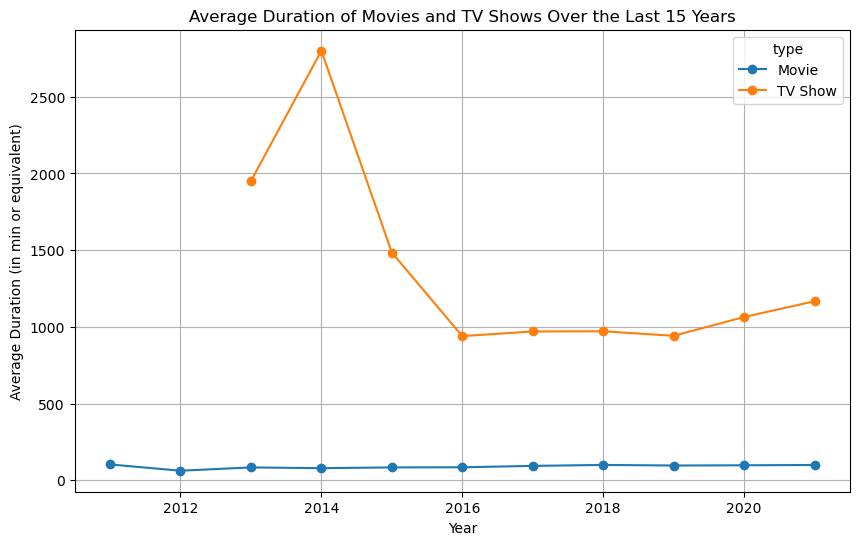

In [51]:
current_year = pd.to_datetime('today').year
df = df[df['year'] >= current_year - 15]

# Clean and convert duration
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)  
df.loc[df['type'] == 'TV Show', 'duration_numeric']*= 600 # Convert each season assumed as 600 minutes (10 hours per season)

# Calculate average duration by year for each type
duration_trends = df.groupby(['year', 'type'])['duration_numeric'].mean().unstack()

# Plot the data
duration_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Duration of Movies and TV Shows Over the Last 15 Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (in min or equivalent)')
plt.grid(True)
plt.show()

In [52]:
df.drop('length', axis=1, inplace=True)

In [53]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_of_year,month_of_year,year,release_date,days_to_netflix,genres,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown Actors],United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9,2021,2020-01-01,633,Documentaries,90.0
1,s2,TV Show,Blood & Water,Unknown Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9,2021,2021-01-01,266,International TV Shows,1200.0
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,9,2021,2021-01-01,266,TV Dramas,600.0
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,[Unknown Actors],Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,9,2021,2021-01-01,266,TV Mysteries,600.0
4,s5,TV Show,Kota Factory,Unknown Director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,9,2021,2021-01-01,266,Crime TV Shows,1200.0


In [54]:
tv_shows = df[df['type'] == 'TV Show']

tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_26081/1279860811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


In [55]:
tv_shows['seasons']

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: seasons, Length: 2487, dtype: float64

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_26081/2167012802.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_numeric'] = movies['duration'].str.extract('(\d+)').astype(float)
/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_26081/2167012802.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_numeric'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


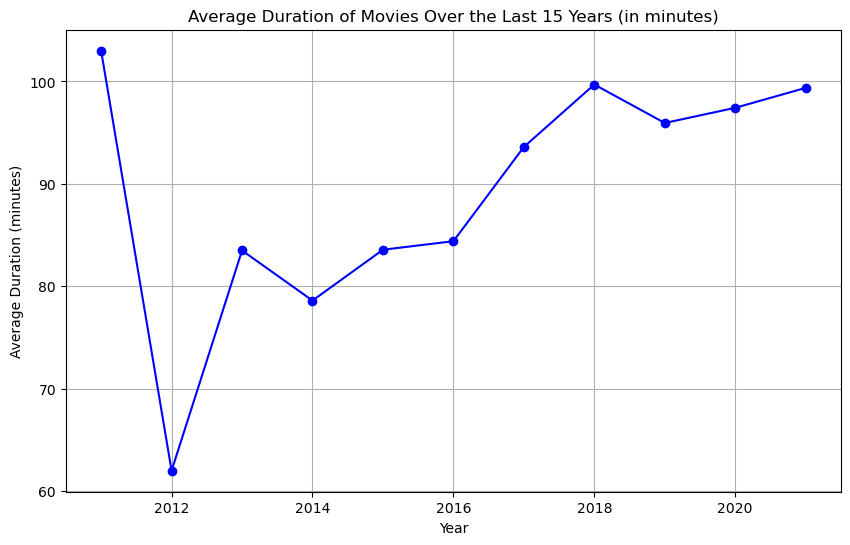

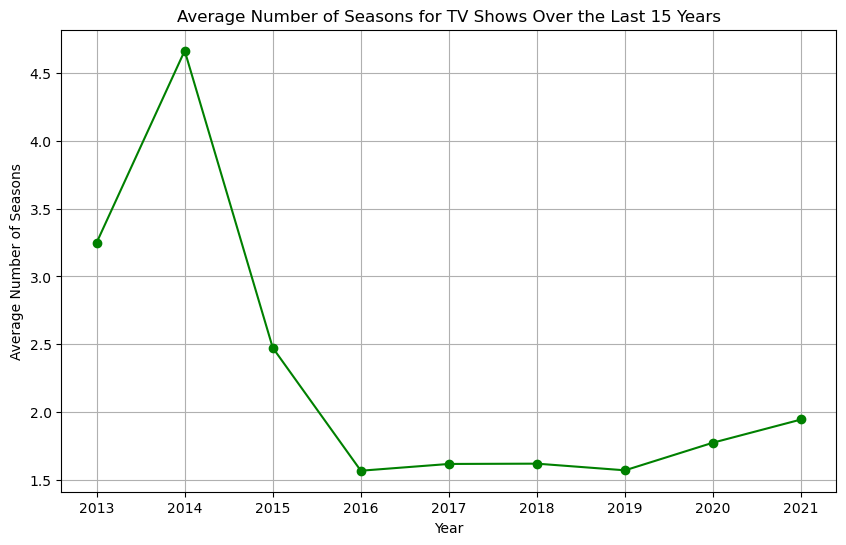

In [56]:
# Current year and last 15 years filter
current_year = pd.to_datetime('today').year
df = df[df['year'] >= current_year - 15]

# Separate data for Movies and TV Shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Extract numeric values from duration
movies['duration_numeric'] = movies['duration'].str.extract('(\d+)').astype(float)
tv_shows['duration_numeric'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Group by year and calculate average duration
movies_duration_trends = movies.groupby('year')['duration_numeric'].mean()
tv_shows_duration_trends = tv_shows.groupby('year')['duration_numeric'].mean()

# Plot for Movies
plt.figure(figsize=(10, 6))
movies_duration_trends.plot(kind='line', marker='o', color='blue')
plt.title('Average Duration of Movies Over the Last 15 Years (in minutes)')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

# Plot for TV Shows
plt.figure(figsize=(10, 6))
tv_shows_duration_trends.plot(kind='line', marker='o', color='green')
plt.title('Average Number of Seasons for TV Shows Over the Last 15 Years')
plt.xlabel('Year')
plt.ylabel('Average Number of Seasons')
plt.grid(True)
plt.show()